Name: Mustafa AYDOGDU


### Task 1: Naive Formula + Uniform Weighting

Time taken for agac.png: 2.73 seconds
Time taken for agacrotated.png: 2.70 seconds
Time taken for chessboard.png: 2.62 seconds
Time taken for chessboardrotated.png: 2.70 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 2.75 seconds
Time taken for labrotated.png: 2.73 seconds


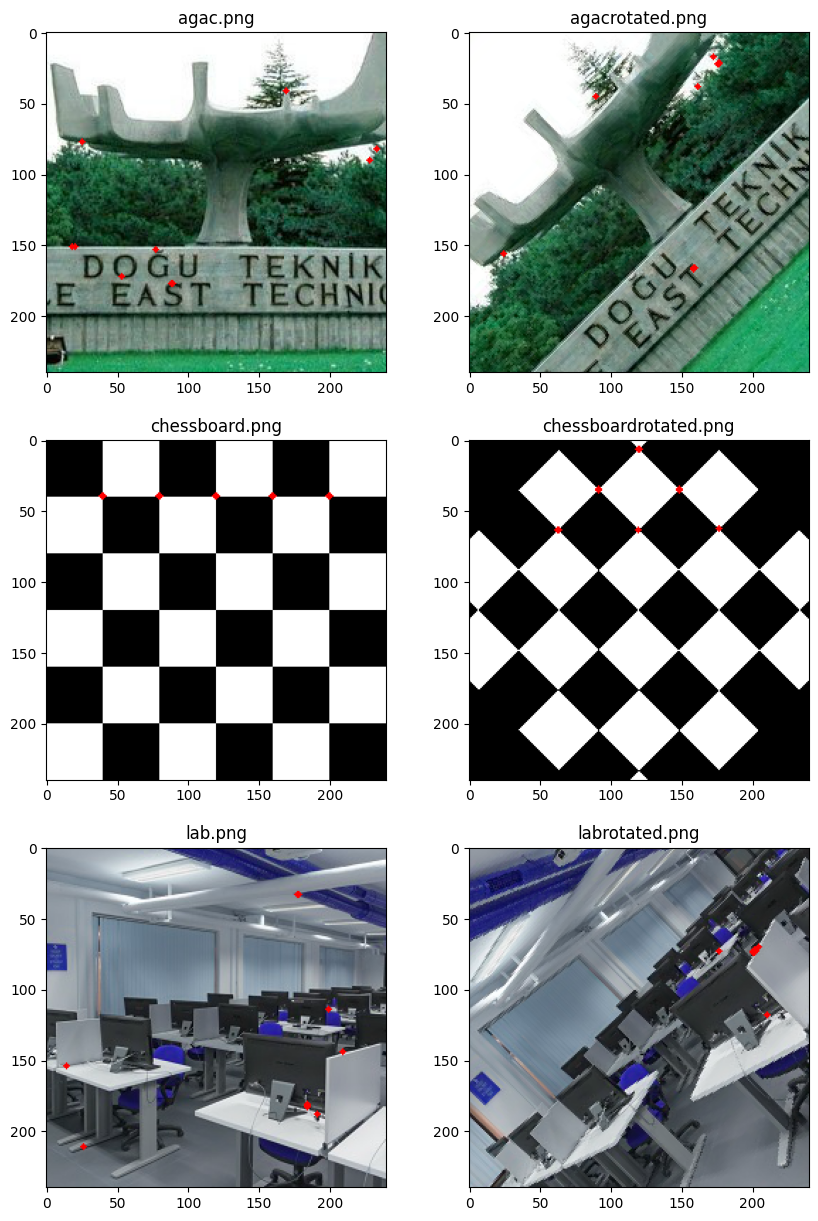

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

# put names into array
images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]

def naive_harris_detector(image):
    # open image
    img = cv2.imread(image)
    img2 = img.copy()
    # copy image
    img_copy = np.copy(img)

    # convert to grayscale
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # slide 3x3 window over image and calculate E(u,v) for each window

    # create empty array to store E(u,v) values
    E = np.zeros(img_copy.shape)

    # calculate E(u,v) for each window by sliding 3x3 window over image in 8 directions
    for i in range(2, img_copy.shape[0] - 2):
        for j in range(2, img_copy.shape[1] - 2):
            main_window = img_copy[i - 1:i + 2, j - 1:j + 2]
            # create 8 windows of 3x3 pixels on left, right, top, bottom and diagonals
            window1 = img_copy[i - 2:i + 1, j - 2:j + 1]
            window2 = img_copy[i - 2:i + 1, j-1:j + 2]
            window3 = img_copy[i - 2:i + 1, j:j + 3]
            window4 = img_copy[i-1:i + 2, j - 2:j + 1]
            window6 = img_copy[i-1:i + 2, j:j + 3]
            window7 = img_copy[i:i + 3, j - 2:j + 1]
            window8 = img_copy[i:i + 3, j - 1:j + 2]
            window9 = img_copy[i:i + 3, j:j + 3]
            # create window array
            window_array = [window1, window2, window3, window4, window9, window6, window7, window8]
            # calculate E(u,v) for each window
            for window in window_array:
                E[i, j] += np.sum(np.square(window - main_window))

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    # take 10 highest indices and store in array
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # plot 10 circles on image at 10 highest indices
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2



fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = naive_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])





## Task1 Discussion


This task implements naive method of Harris detector and does not include non-maximum suppression. Since non-maximum suppression is not implemented, detected corners are close to each other. Therefore, it cannot detect 10 distinct corners. Also, it is not rotation invariant, the corners detected in the rotated and the original image are not the same.

# Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

Time taken for agac.png: 3.34 seconds
Time taken for agacrotated.png: 3.22 seconds
Time taken for chessboard.png: 3.30 seconds
Time taken for chessboardrotated.png: 3.17 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 3.26 seconds
Time taken for labrotated.png: 3.44 seconds


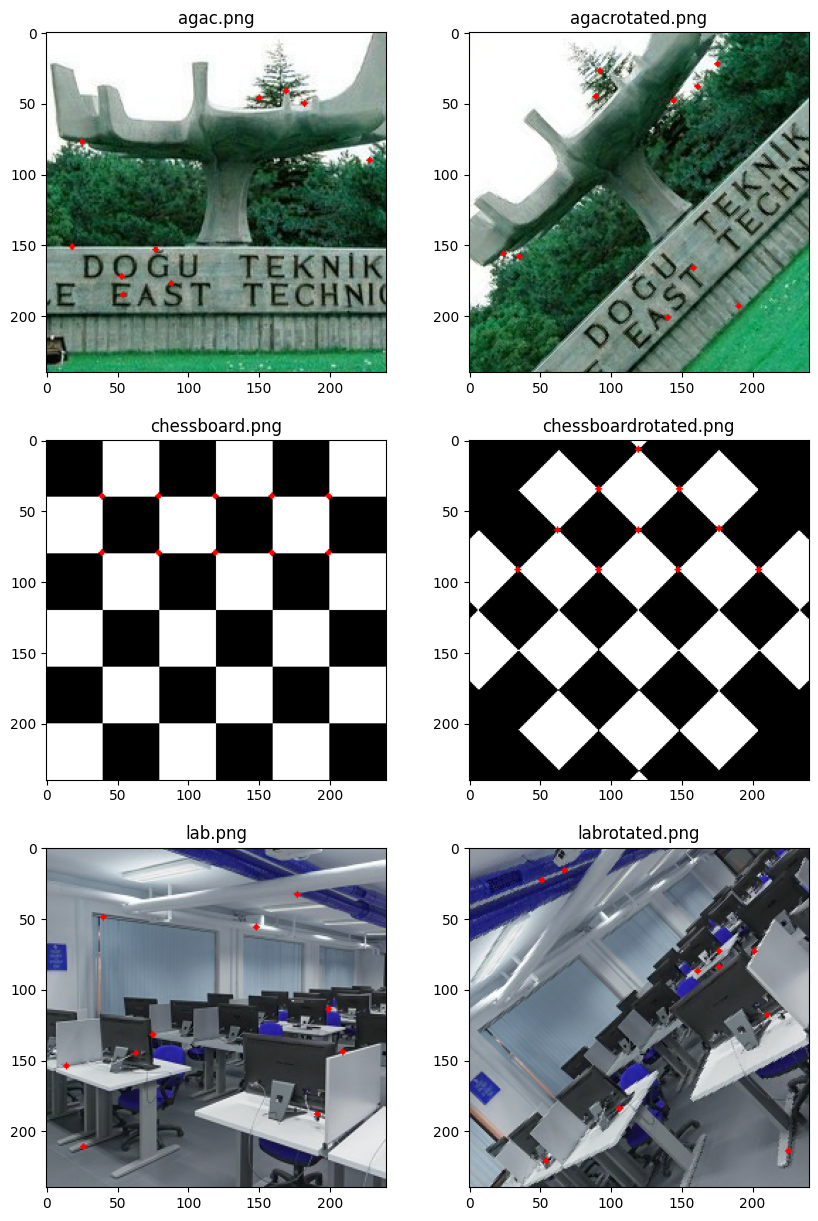

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

# put names into array
images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def naive_nonmaximum_harris_detector(image):
    # open image
    img = cv2.imread(image)
    img2 = img.copy()
    # copy image
    img_copy = np.copy(img)

    # convert to grayscale
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # slide 3x3 window over image and calculate E(u,v) for each window

    # create empty array to store E(u,v) values
    E = np.zeros(img_copy.shape)

    # calculate E(u,v) for each window by sliding 3x3 window over image in 8 directions
    for i in range(2, img_copy.shape[0] - 2):
        for j in range(2, img_copy.shape[1] - 2):
            main_window = img_copy[i - 1:i + 2, j - 1:j + 2]
            # create 8 windows of 3x3 pixels on left, right, top, bottom and diagonals
            window1 = img_copy[i - 2:i + 1, j - 2:j + 1]
            window2 = img_copy[i - 2:i + 1, j - 1:j + 2]
            window3 = img_copy[i - 2:i + 1, j:j + 3]
            window4 = img_copy[i - 1:i + 2, j - 2:j + 1]
            window6 = img_copy[i - 1:i + 2, j:j + 3]
            window7 = img_copy[i:i + 3, j - 2:j + 1]
            window8 = img_copy[i:i + 3, j - 1:j + 2]
            window9 = img_copy[i:i + 3, j:j + 3]
            # create window array
            window_array = [window1, window2, window3, window4, window9, window6, window7, window8]
            # calculate E(u,v) for each window
            for window in window_array:
                E[i, j] += np.sum(np.square(window - main_window))

    # non-maximum suppression
    # slide 5x5 window over image and find maximum E(u,v) value in each window
    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]),
                                                   E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    # take 10 highest indices and store in array
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # plot 10 circles on image at 10 highest indices
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = naive_nonmaximum_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])



## Task2 Discussion

This task implements naive method of Harris detector and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is not rotation invariant, the corners detected in the rotated and the original image are not the same. Finally, it is slower than Task1 implementation since it has extra computational complexity for non-maximum suppression.

### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

Time taken for agac.png: 11.65 seconds
Time taken for agacrotated.png: 9.67 seconds
Time taken for chessboard.png: 11.68 seconds
Time taken for chessboardrotated.png: 11.09 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 11.24 seconds
Time taken for labrotated.png: 9.94 seconds


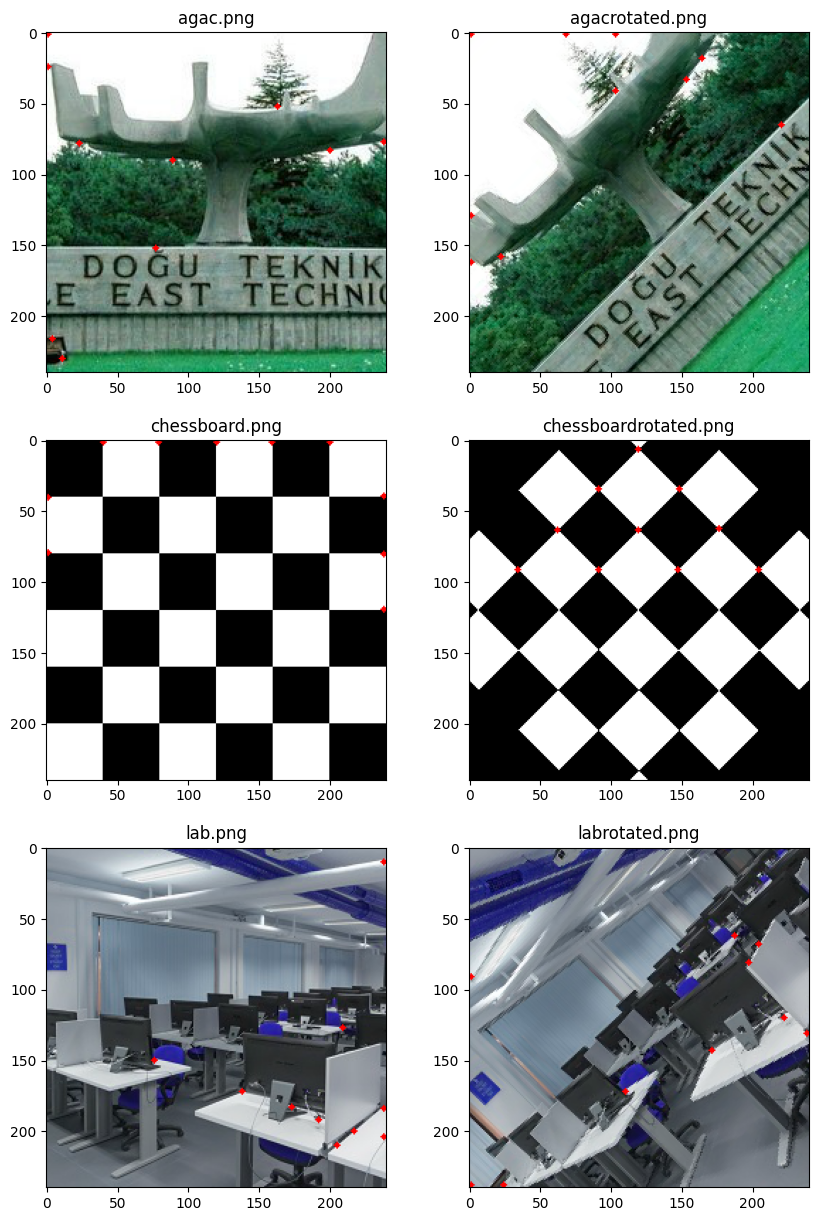

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def taylor_harris_detector(img):
    # open image
    img = cv2.imread(img)
    # copy image
    img_copy = img.copy()
    img2 = img.copy()
    # convert gray
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    # calculate gradients
    Ix = scipy.signal.convolve2d(img_copy, kernelx, mode='same')
    Iy = scipy.signal.convolve2d(img_copy, kernely, mode='same')

    # calculate Ix^2, Iy^2, IxIy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy

    # create E(u,v) array
    E = np.zeros(img_copy.shape)

    # calculate E(u,v) for each window by sliding 3x3 window over image in 8 directions
    for i in range(1, img_copy.shape[0] - 1):
        for j in range(1, img_copy.shape[1] - 1):
            Ix_window = Ix2[i - 1:i + 2, j - 1:j + 2]
            Iy_window = Iy2[i - 1:i + 2, j - 1:j + 2]
            Ixy_window = Ixy[i - 1:i + 2, j - 1:j + 2]

            H = []
            for k in range(0, 3):
                for l in range(0, 3):
                    H.append(np.array([[Ix_window[k, l], Ixy_window[k, l]], [Ixy_window[k, l], Iy_window[k, l]]]))

            for m in range(-1, 2):
                for n in range(-1, 2):
                    if m == 0 or n == 0:
                        continue
                    for h in H:
                        E[i, j] += np.matmul(np.matmul(np.array([m, n]), h), np.array([m, n]).T)

    # non-maximum suppression
    # slide 5x5 window over image and find maximum E(u,v) value in each window
    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(
                E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]),
                E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # draw circles on image at indices of 10 highest values
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = taylor_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])

## Task3 Discussion

This task implements Taylor Approximation method of Harris detector and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is not rotation invariant, the corners detected in the rotated and the original image are not the same. Since it is a approximation of the Task1 method, I expect it to be faster but implementation wise, it requires more computations.


### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

Time taken for agac.png: 3.12 seconds
Time taken for agacrotated.png: 3.10 seconds
Time taken for chessboard.png: 4.36 seconds
Time taken for chessboardrotated.png: 3.37 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 3.08 seconds
Time taken for labrotated.png: 3.46 seconds


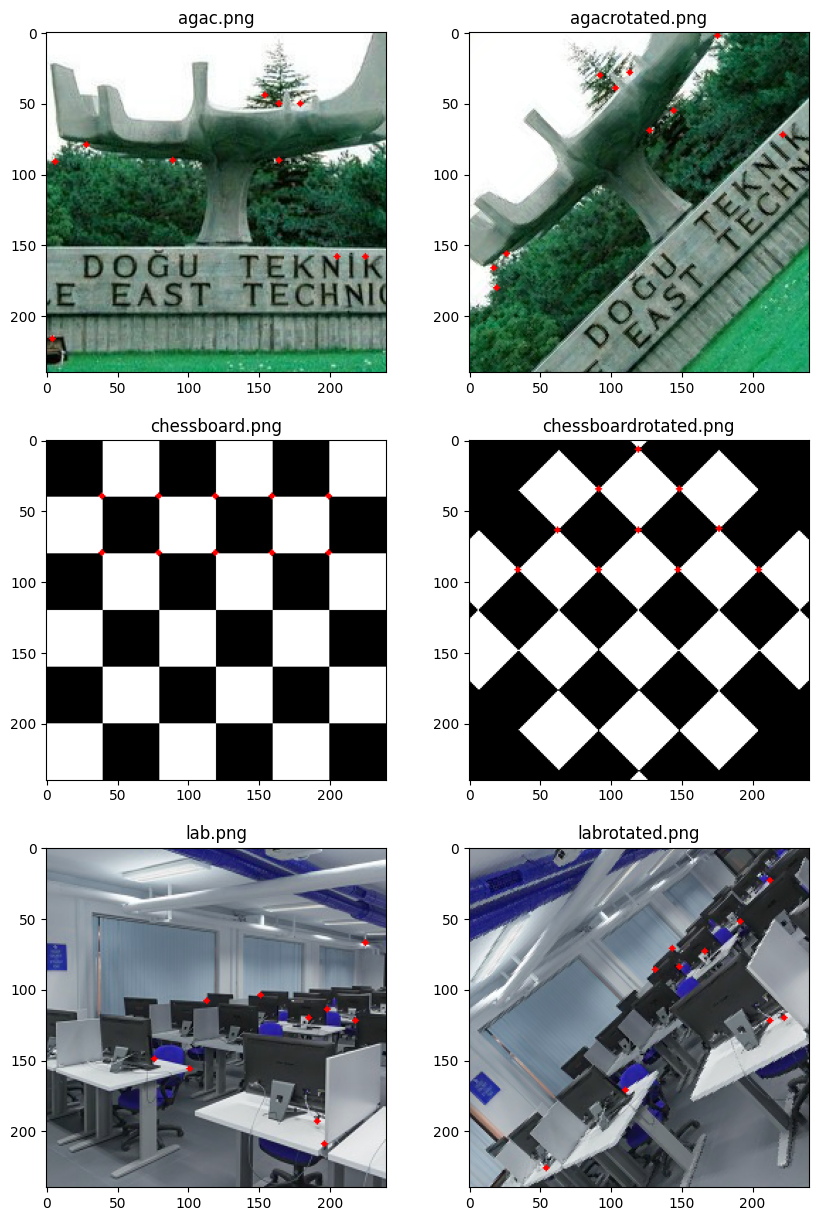

In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def smaller_eigen_harris_detector(img):
    # open image
    img = cv2.imread(img)
    # copy image
    img2 = img.copy()
    img_copy = img.copy()
    # convert gray
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # calculate gradients
    Ix = cv2.Sobel(img_copy, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img_copy, cv2.CV_64F, 0, 1, ksize=3)

    # calculate Ix^2, Iy^2, IxIy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy

    # create E(u,v) array
    E = np.zeros(img_copy.shape)

    for i in range(1, img_copy.shape[0] - 1):
        for j in range(1, img_copy.shape[1] - 1):
            Ix_window = Ix2[i - 1:i + 2, j - 1:j + 2]
            Iy_window = Iy2[i - 1:i + 2, j - 1:j + 2]
            Ixy_window = Ixy[i - 1:i + 2, j - 1:j + 2]

            # calculate H
            H = np.array([[np.sum(Ix_window), np.sum(Ixy_window)], [np.sum(Ixy_window), np.sum(Iy_window)]])
            # calculate eigenvalues of H
            eigenvalues = np.linalg.eigvals(H)
            # take the minimum eigenvalue and check if it is greater than 3
            if np.min(eigenvalues) > 3:
                E[i, j] = np.min(eigenvalues)

    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]), E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # draw circles on image at indices of 10 highest values
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = smaller_eigen_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])


## Task4 Discussion

This task implements Smaller Eigenvalue as corner score method of Harris detector and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is close to be rotation invariant, the corners detected in the rotated and the original image are close to each other. Unlike Task3, since it does not calculate any matrix multiplication and does not compute over 8 directions, it is much faster. And it detects corners better than Task3.


### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

Time taken for agac.png: 2.50 seconds
Time taken for agacrotated.png: 2.65 seconds
Time taken for chessboard.png: 2.66 seconds
Time taken for chessboardrotated.png: 2.48 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 2.41 seconds
Time taken for labrotated.png: 2.32 seconds


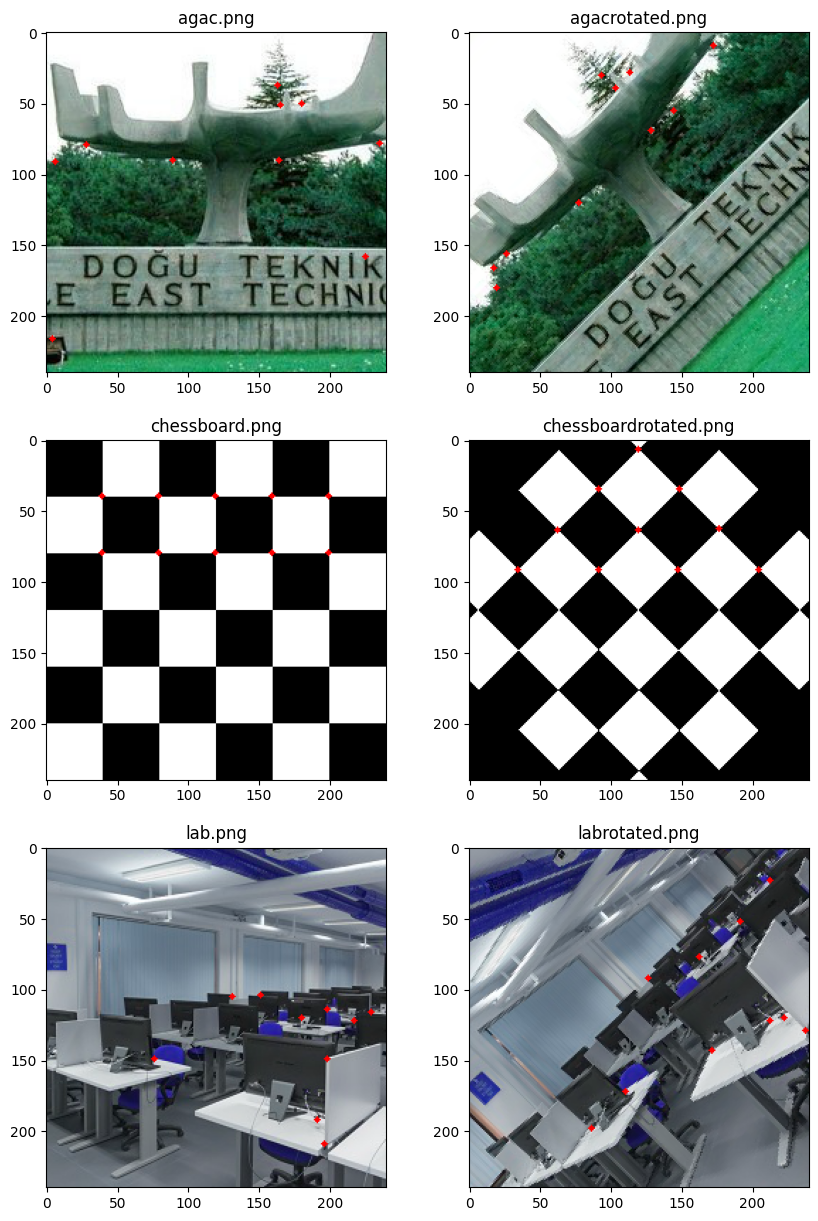

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def r_function_harris_detector(img):
    # open image
    img = cv2.imread(img)
    # copy image
    img2 = img.copy()
    img_copy = img.copy()
    # convert gray
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # calculate gradients
    Ix = cv2.Sobel(img_copy, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img_copy, cv2.CV_64F, 0, 1, ksize=3)

    # calculate Ix^2, Iy^2, IxIy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy

    # create E(u,v) array
    E = np.zeros(img_copy.shape)
    k = 0.04

    for i in range(1, img_copy.shape[0] - 1):
        for j in range(1, img_copy.shape[1] - 1):
            Ix_window = Ix2[i - 1:i + 2, j - 1:j + 2]
            Iy_window = Iy2[i - 1:i + 2, j - 1:j + 2]
            Ixy_window = Ixy[i - 1:i + 2, j - 1:j + 2]

            # calculate H
            H = np.array([[np.sum(Ix_window), np.sum(Ixy_window)], [np.sum(Ixy_window), np.sum(Iy_window)]])
            # calculate R
            determinant = np.linalg.det(H)
            trace = np.trace(H)
            R = determinant - k * np.square(trace)
            E[i, j] = R

    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]), E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # draw circles on image at indices of 10 highest values
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = r_function_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])

## Task5 Discussion


This task implements R function as corner score method of Harris detector and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is close to be rotation invariant, the corners detected in the rotated and the original image are close to each other. It is better than Task4 implementation since it detects corners better. And it is faster than Task4 implementation in terms of run time complexity.


### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

Time taken for agac.png: 0.77 seconds
Time taken for agacrotated.png: 1.04 seconds
Time taken for chessboard.png: 1.07 seconds
Time taken for chessboardrotated.png: 0.71 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 0.92 seconds
Time taken for labrotated.png: 0.64 seconds


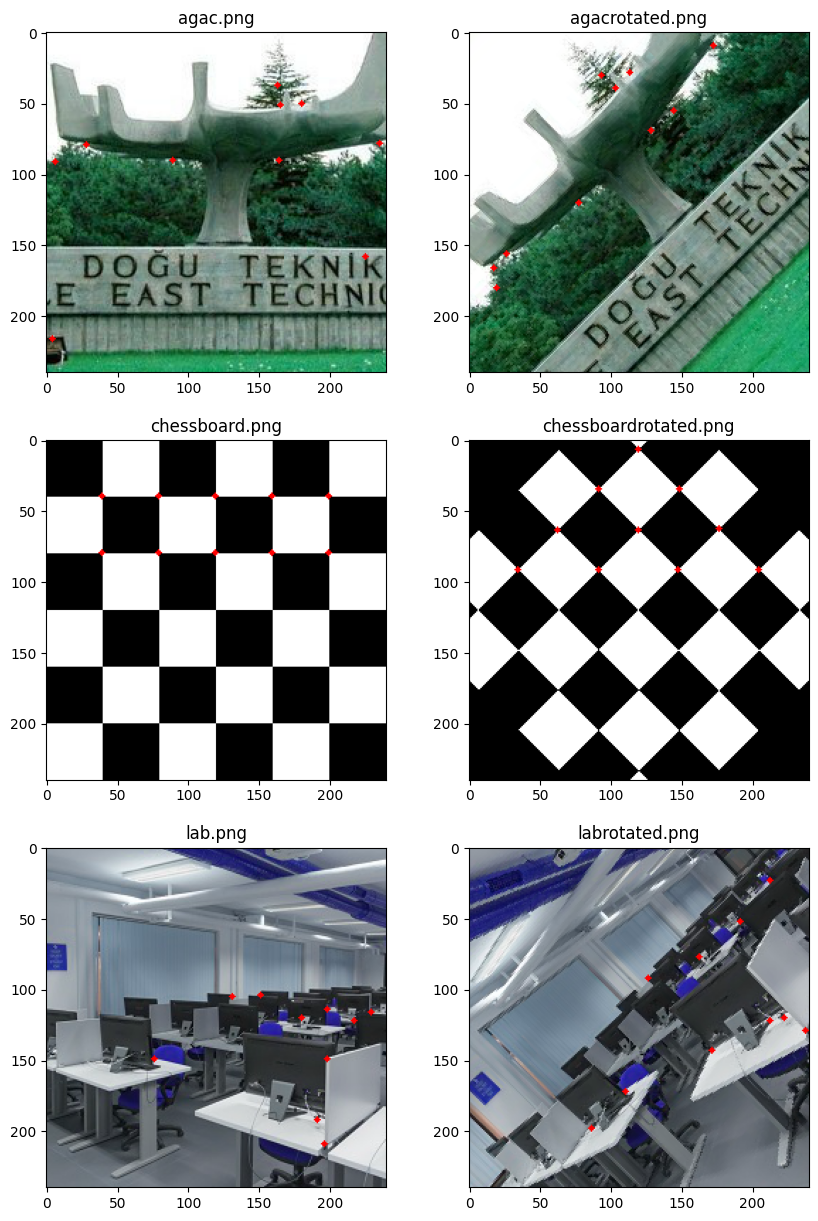

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def r_fast_uniform_harris_detector(img):
    # open image
    img = cv2.imread(img)
    # copy image
    img2 = img.copy()
    img_copy = img.copy()
    # convert gray
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # calculate gradients
    Ix = cv2.Sobel(img_copy, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img_copy, cv2.CV_64F, 0, 1, ksize=3)

    # calculate Ix^2, Iy^2, IxIy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy

    uniform_filter = np.ones((3, 3))
    Ix2_conv = scipy.signal.convolve2d(Ix2, uniform_filter, mode='same')
    Iy2_conv = scipy.signal.convolve2d(Iy2, uniform_filter, mode='same')
    Ixy_conv = scipy.signal.convolve2d(Ixy, uniform_filter, mode='same')

    # calculate det(M) and trace(M)
    det_M = Ix2_conv * Iy2_conv - Ixy_conv * Ixy_conv
    trace_M = Ix2_conv + Iy2_conv

    E = det_M - 0.04 * trace_M ** 2

    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]), E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # draw circles on image at indices of 10 highest values
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = r_fast_uniform_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])


## Task6 Discussion

This task implements R function with fast windowing based on filtering method of Harris detector using uniform weighting and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is close to be rotation invariant, the corners detected in the rotated and the original image are close to each other. Its corner detection performance is similar to Task5 implementation but it is much faster than Task5 implementation because unlike Task5, it does not iterate over image for computation.


### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

Time taken for agac.png: 0.82 seconds
Time taken for agacrotated.png: 0.76 seconds
Time taken for chessboard.png: 0.80 seconds
Time taken for chessboardrotated.png: 0.84 seconds


libpng warning: iCCP: known incorrect sRGB profile


Time taken for lab.png: 0.85 seconds
Time taken for labrotated.png: 0.77 seconds


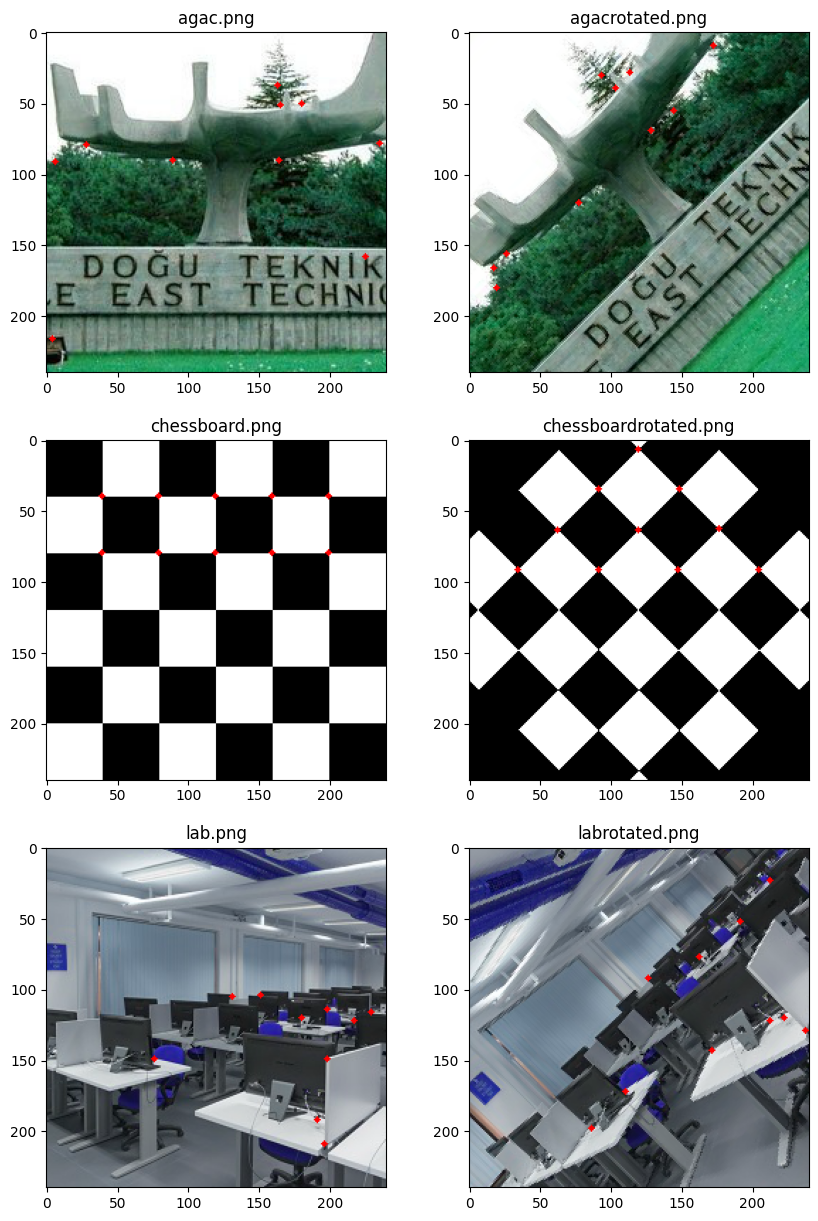

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import time

agac = 'agac.png'
agac_rotated = 'agacrotated.png'
chessboard = 'chessboard.png'
chessboard_rotated = 'chessboardrotated.png'
lab = 'lab.png'
lab_rotated = 'labrotated.png'

images = [agac, agac_rotated, chessboard, chessboard_rotated, lab, lab_rotated]


def r_fast_gaussian_harris_detector(img):
    # open image
    img = cv2.imread(img)
    # copy image
    img2 = img.copy()
    img_copy = img.copy()
    # convert gray
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # calculate gradients
    Ix = cv2.Sobel(img_copy, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(img_copy, cv2.CV_64F, 0, 1, ksize=3)

    # calculate Ix^2, Iy^2, IxIy
    Ix2 = np.square(Ix)
    Iy2 = np.square(Iy)
    Ixy = Ix * Iy

    # convolution with gaussian filter
    Ix2_conv = scipy.ndimage.gaussian_filter(Ix2, sigma=1)
    Iy2_conv = scipy.ndimage.gaussian_filter(Iy2, sigma=1)
    Ixy_conv = scipy.ndimage.gaussian_filter(Ixy, sigma=1)

    # calculate det(M) and trace(M)
    det_M = Ix2_conv * Iy2_conv - Ixy_conv * Ixy_conv
    trace_M = Ix2_conv + Iy2_conv

    E = det_M - 0.04 * trace_M ** 2

    for i in range(5, img_copy.shape[0] - 5):
        for j in range(5, img_copy.shape[1] - 5):
            # make all values in the window 0 except the maximum value
            E[i - 5:i + 5, j - 5:j + 5] = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]), E[i - 5:i + 5, j - 5:j + 5], 0)
            # if there are more than 1 maximum value, take indices of the maximum values
            if np.count_nonzero(E[i - 5:i + 5, j - 5:j + 5]) > 1:
                indices = np.where(E[i - 5:i + 5, j - 5:j + 5] == np.max(E[i - 5:i + 5, j - 5:j + 5]))
                # make all values of indices 0 except the first one
                E[i - 5:i + 5, j - 5:j + 5][indices[0][1:][0], indices[1][1:]] = 0

    # find 10 highest indices of E(u,v) and store in array
    # sort E(u,v) array
    E_sorted = np.sort(E, axis=None)
    # get 10 highest values
    E_highest = E_sorted[-10:]
    # get indices of 10 highest values
    E_highest_indices = np.where(np.isin(E, E_highest))
    E_highest_indices = np.array([E_highest_indices[0], E_highest_indices[1]]).T

    # draw circles on image at indices of 10 highest values
    for i in range(10):
        # plot small circle
        cv2.circle(img2, (E_highest_indices[i, 1], E_highest_indices[i, 0]), 2, (255, 0, 0), -1)

    return img2


fig, axs = plt.subplots(3, 2, figsize=(10, 15))
for i in range(len(images)):
    start = time.time()
    img = r_fast_uniform_harris_detector(images[i])
    end = time.time()
    print('Time taken for ' + images[i] + ': ' + str((end - start).__format__('0.2f')) + ' seconds')
    axs[i // 2, i % 2].imshow(img)
    axs[i // 2, i % 2].set_title(images[i])


## Task7 Discussion

This task implements R function with fast windowing based on filtering method of Harris detector using gaussian weighting and includes non-maximum suppression. Since non-maximum suppression is implemented, detected corners are not close to each other. Therefore, it can detect 10 distinct corners. Also, it is close to be rotation invariant, the corners detected in the rotated and the original image are close to each other. Its corner detection performance and runtime complexity is similar to Task6 implementation. I expect it to be completely rotation invariant, but it is not.


